In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'NVDA'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
0,2012-01-03,0.321919,0.351000,0.360000,0.350250,0.357500,468044000
1,2012-01-04,0.325588,0.355000,0.356500,0.348000,0.351250,347372000
2,2012-01-05,0.337281,0.367750,0.369500,0.351750,0.353250,563548000
3,2012-01-06,0.333383,0.363500,0.367750,0.359250,0.367500,533252000
4,2012-01-09,0.333383,0.363500,0.370500,0.361000,0.363750,508244000
...,...,...,...,...,...,...,...
2756,2022-12-14,17.662373,17.674000,18.252001,17.420000,17.987000,496888000
2757,2022-12-15,16.940845,16.952000,17.320000,16.700001,17.146000,478542000
2758,2022-12-16,16.560095,16.570999,17.041000,16.410000,16.864000,478232000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

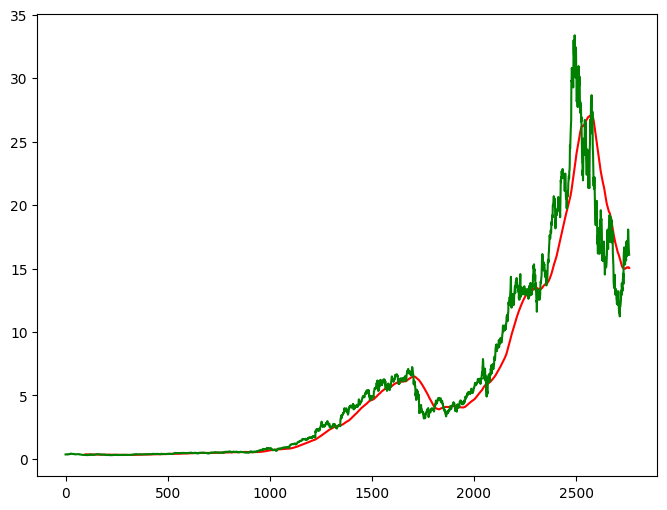

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

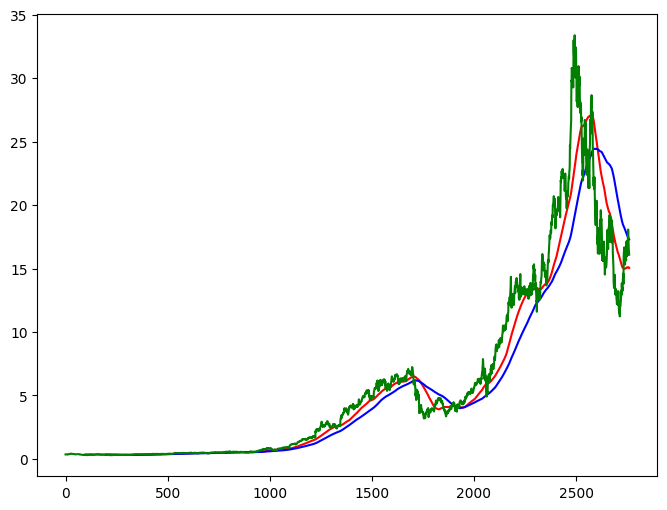

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2208

In [13]:
data_test.shape[0]

553

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 [==============================] - 33s 311ms/step - loss: 0.0127
Epoch 2/50
66/66 [==============================] - 22s 340ms/step - loss: 0.0036
Epoch 3/50
66/66 [==============================] - 24s 367ms/step - loss: 0.0028
Epoch 4/50
66/66 [==============================] - 24s 370ms/step - loss: 0.0029
Epoch 5/50
66/66 [==============================] - 26s 399ms/step - loss: 0.0027
Epoch 6/50
66/66 [==============================] - 24s 364ms/step - loss: 0.0024
Epoch 7/50
66/66 [==============================] - 28s 425ms/step - loss: 0.0023
Epoch 8/50
66/66 [==============================] - 25s 385ms/step - loss: 0.0027
Epoch 9/50
66/66 [==============================] - 24s 368ms/step - loss: 0.0022
Epoch 10/50
66/66 [==============================] - 25s 375ms/step - loss: 0.0023
Epoch 11/50
66/66 [==============================] - 24s 371ms/step - loss: 0.0020
Epoch 12/50
66/66 [==============================] - 21s 319ms/step - loss: 0.0022
Epoch 13/50
6

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

18/18 [==============================] - 4s 84ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

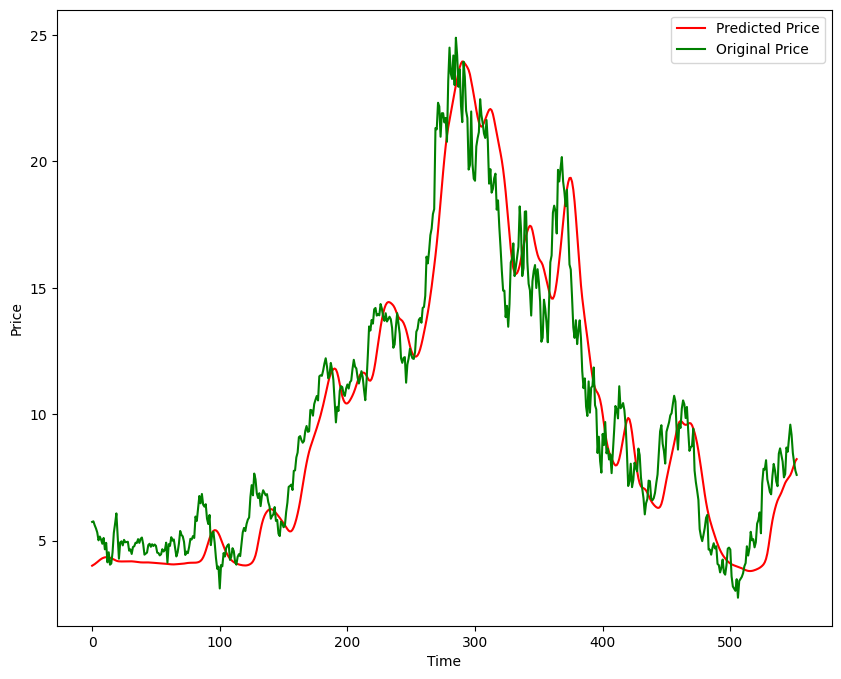

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')